In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [14]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2))) # 2x2 max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 64 3x3 filters
model.add(layers.MaxPooling2D((2, 2))) # 2x2 max pooling
model.add(layers.Flatten()) # Flatten the 2D arrays for fully connected layers
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax')) # 10 output nodes

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [16]:
custom_optimizer = Adam(learning_rate=0.0001) # Define a custom optimizer
model.compile(optimizer=custom_optimizer, # Use the custom optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4119 - accuracy: 0.8886 - val_loss: 0.1360 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1180 - accuracy: 0.9651 - val_loss: 0.0836 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0824 - accuracy: 0.9756 - val_loss: 0.0714 - val_accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0655 - accuracy: 0.9801 - val_loss: 0.0585 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0462 - val_accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.0470 - val_accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0435 - accuracy: 0.9868 - val_loss: 0.0387 -

KeyboardInterrupt: 

In [18]:
# early stopping

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [26]:
history =  model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.0352 - val_accuracy: 0.9879
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0417 - val_accuracy: 0.9876


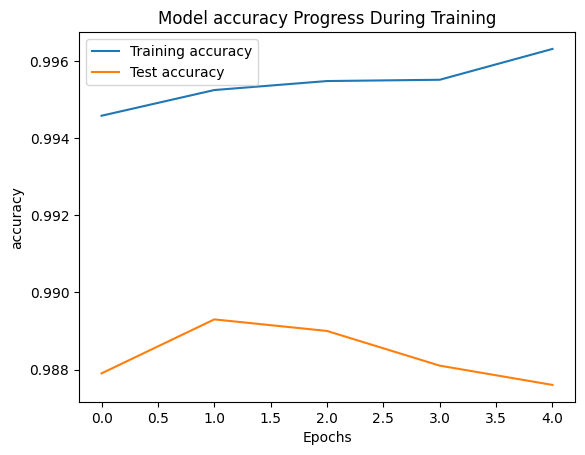

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()

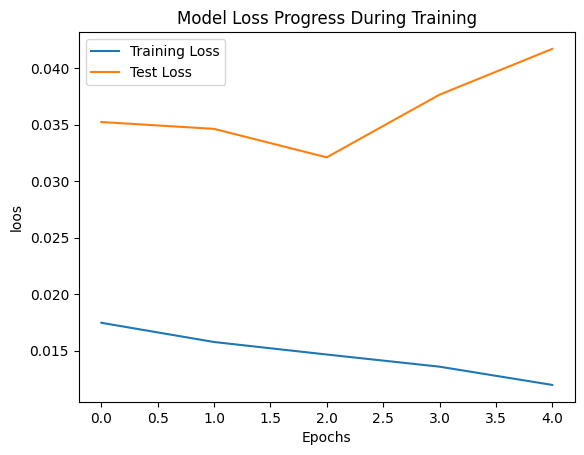

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('loos')
plt.legend(['Training Loss', 'Test Loss'])
plt.show()